In [1]:
# Math showcasing how to convert a Classical Neuron to a Finite Gaussian Neuron and back

In [2]:
from __future__ import print_function
import numpy as np

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# math and visual proof 

# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(zip(X1s.flatten(),X2s.flatten()),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


In [5]:
num_dim = 2

# random classical neuron params
W = np.random.randint(low=-10, high=10, size=2)
print(W)
b = 20.0*(np.random.rand(1)-0.5)
print(b)

# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

# orthogonal line
ortho_line = W[1]*X1 / W[0]

# point closest to origin will be new centers
centers = (-b/np.dot(W,W))*W
print(centers)

# sig equal to input dim
sig = num_dim

# backwards 
bb = -np.dot(W,centers)
print( bb)

[-7 -3]
[9.82526941]
[1.18580838 0.50820359]
9.82526941148135


In [6]:
# heatmap of classic activity
n_activity = np.sum(W*inputs_heatmap, axis=1)+b
print(n_activity.shape)

(25921,)


<IPython.core.display.Javascript object>


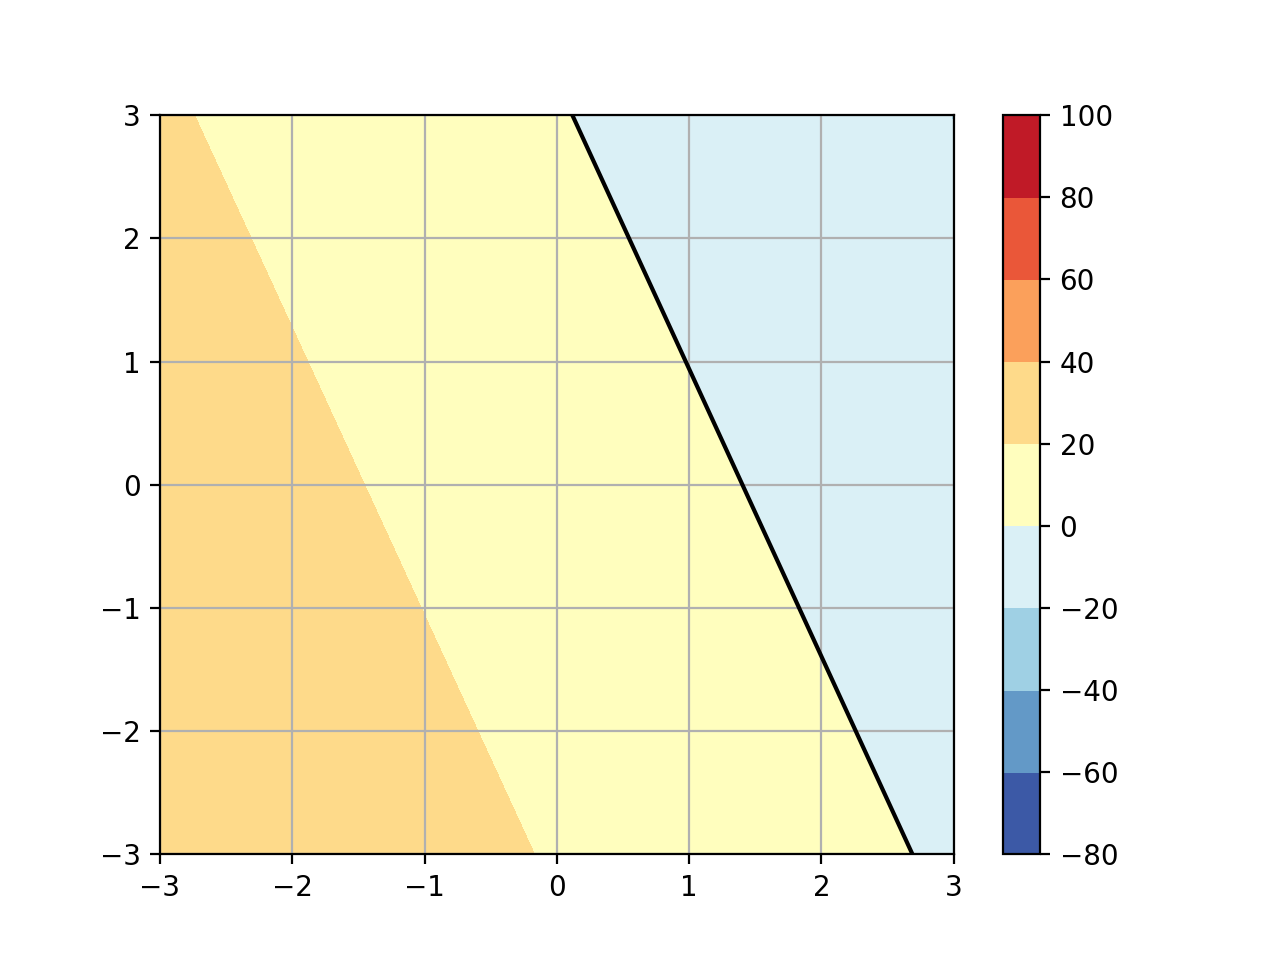

In [7]:
# plot the zero line
plt.plot(X1,zero_line, color='black')

# levels = 2*np.arange(-sig,sig+0.1,sig/10.0)
# ticks = 2*np.arange(-sig,sig+1, sig/5.0)

# plt.contourf(X1s, X2s, np.reshape(n_activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.contourf(X1s, X2s, np.reshape(n_activity, np.shape(X1s) ), cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
plt.colorbar()
#reset axes
plt.axis([-3,3, -3, 3])
plt.grid(True)
plt.show()

In [8]:
# heatmap radial activity 
r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-centers), axis=1))
print(r_activity.shape)

# overall heatmap activity
activity = n_activity*r_activity

(25921,)


<IPython.core.display.Javascript object>


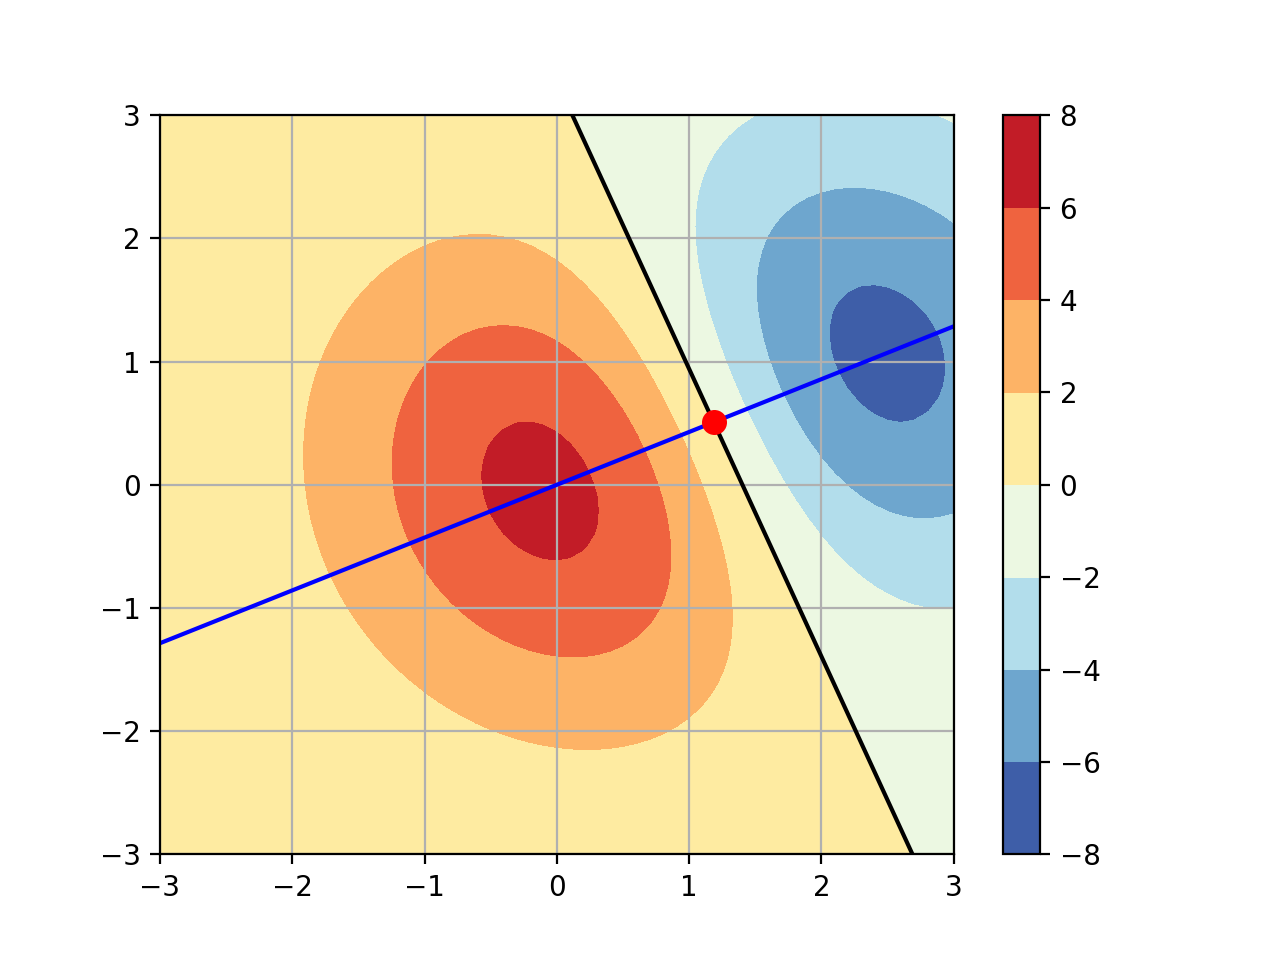

In [9]:
# plot the zero line
plt.plot(X1,zero_line, color='black')
plt.plot(X1,ortho_line, color='blue')
plt.plot(centers[0], centers[1], marker='o', markersize=8, color="red")

# levels = 2*np.arange(-sig,sig+0.1,sig/10.0)
# ticks = 2*np.arange(-sig,sig+1, sig/5.0)

# plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.contourf(X1s, X2s, np.reshape(activity, np.shape(X1s) ), cmap=cm.RdYlBu_r)

# plt.colorbar(ticks=ticks)
plt.colorbar()
#reset axes
plt.axis([-3,3, -3, 3])
plt.grid(True)
plt.show()